# **Import Library**

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

%pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

%pip install wordcloud
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

# Mengunduh dataset untuk tokenisasi dan stopwords
nltk.download('punkt')  # Mengunduh dataset untuk tokenisasi teks
nltk.download('stopwords')  # Mengunduh daftar stopwords untuk bahasa Indonesia dan Inggris


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\espej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\espej\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Loading Dataset**

In [3]:
import pandas as pd
# Membaca file CSV
df = pd.read_csv('ulasan_aplikasi.csv')

# Menampilkan 5 baris pertama
df.head()


,Review
0,"Gua kira main crypto tuh ribet banget cuy, kay..."
1,"bagus banget sudah saya coba, sangat suka sela..."
2,sangat membantu transaksi aset digital dan e m...
3,"Udah pakai Triv hampir setahun, dan sejauh ini..."
4,"Setelah saya coba beberapa bulan ini, masih ba..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  14876 non-null  object
dtypes: object(1)
memory usage: 116.3+ KB


In [5]:
df.isnull().sum()

Review    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(742)

In [7]:
clean_df =df.dropna()

clean_df = clean_df.drop_duplicates()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14134 entries, 0 to 14874
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  14134 non-null  object
dtypes: object(1)
memory usage: 220.8+ KB


# **Preprocessing**

In [15]:
# Fungsi cleaningText untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtag
    text = re.sub(r'RT[\s]', '', text)  # remove RT
    text = re.sub(r"http\S+", '', text)  # remove link
    text = re.sub(r'[0-9]+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove special characters
    text = text.replace('\n', ' ')  # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuations
    text = text.strip(' ')  # remove characters space from both left and right text
    return text

# Fungsi casefoldingText untuk mengubah teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Fungsi tokenizingText untuk memecah teks menjadi list kata
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Fungsi filteringText untuk menghapus stopwords
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered

# Fungsi stemmingText untuk melakukan stemming pada kata
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Fungsi untuk mengubah list kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
# Dictionary kata slang dan padanannya
slangwords = {
    'gak': 'tidak',
    'nggak': 'tidak',
    'nya': 'itu',
    'yaa': 'ya',
    'sih': 'saja',
    'ku': 'saya',
    'lo': 'kamu',
    'loi': 'kamu',
    'loh': 'loh',
    'wa': 'saya',
    'g': 'tidak',
    'ga': 'tidak',
    'woy': 'hei',
    'ye': 'iya',
    'kayak': 'seperti',
    'gpp': 'tidak apa-apa',
    'bgt': 'banget',
    'biasaaja': 'biasa saja',
    'tq': 'terima kasih',
    'pls': 'mohon',
    'sm': 'sama',
    'nm': 'nama',
    'btw': 'ngomong-ngomong',
    'klo': 'kalau',
    'gaul': 'gaul',
    'cuy': 'kawan',
    'ribet': 'rumit',
    'anjir': 'anjing',
    'anjay': 'anjing',
    'parah': 'sangat',
    'gampang': 'mudah',
    'cakep': 'bagus',
    'dikit': 'sedikit',
    'udh': 'sudah',
    'ato': 'atau',
    'dr': 'dari',
    'krn': 'karena',
    'skrg': 'sekarang',
    'buat': 'untuk',
    'yg': 'yang',
    'dlu': 'dulu',
    'kyc': 'verifikasi identitas',
    'wd': 'penarikan',
    'depo': 'deposit',
    'tranding': 'trading',
    'apk': 'aplikasi',
    'trs': 'terus',
    'pdhal': 'padahal',
    'lg': 'lagi',
    'gmn': 'bagaimana',
    'ampe': 'sampai',
    'jd': 'jadi',
    'kek': 'seperti',
    'sm': 'sama',
    'dpt': 'dapat',
    'lgi': 'lagi',
    'tpi': 'tapi',
    'mnrt': 'menurut',
    'skli': 'sekali',
    'pkoknya': 'pokoknya',
    'trus': 'terus',
    'wkwk': 'tertawa',
    'wkwkwk': 'tertawa',
    'skrg': 'sekarang',
    'bs': 'bisa',
    'tp': 'tapi',
    'kalo': 'kalau',
    'gua': 'saya'
}

# Fungsi untuk memperbaiki kata slang
def fix_slangwords(text):
    words = text.split()  # Memisahkan teks menjadi kata
    fixed_words = []  # Menyimpan kata yang sudah diperbaiki

    # Mengecek setiap kata dalam teks
    for word in words:
        # Jika kata ada dalam dictionary slang, ganti dengan kata yang benar
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)  # Jika tidak ada slang, biarkan tetap

    # Gabungkan kembali kata-kata menjadi kalimat
    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [17]:
clean_df

,Review,cleaned_review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"bagus banget sudah saya coba, sangat suka sela...","bagus banget sudah saya coba, sangat suka sela...",bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,"[bagus, banget, sudah, saya, coba, sangat, suk...","[bagus, banget, coba, suka, pemakaian, gaada, ...",bagus banget coba suka pemakaian gaada kendala...
1,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,"[sangat, membantu, transaksi, aset, digital, d...","[membantu, transaksi, aset, digital, e, money,...",membantu transaksi aset digital e money proses...
2,"Udah pakai Triv hampir setahun, dan sejauh ini...","Udah pakai Triv hampir setahun, dan sejauh ini...",Udah pakai Triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,"[udah, pakai, triv, hampir, setahun, dan, seja...","[udah, pakai, triv, setahun, oke, transaksi, c...",udah pakai triv setahun oke transaksi cepet ta...
3,"Setelah saya coba beberapa bulan ini, masih ba...","Setelah saya coba beberapa bulan ini, masih ba...",Setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,"[setelah, saya, coba, beberapa, bulan, ini, ma...","[coba, kekurangan, aplikasi, harga, jual, beli...",coba kekurangan aplikasi harga jual beli berbe...
4,"aplikasi yang sangat sangat membantu sihhhh,ap...","aplikasi yang sangat sangat membantu sihhhh,ap...",aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,"[aplikasi, yang, sangat, sangat, membantu, sih...","[aplikasi, membantu, sihhhhapa, pemula, masuk,...",aplikasi membantu sihhhhapa pemula masuk dunia...
...,...,...,...,...,...,...,...,...
12636,Aku kaya,Aku kaya,Aku kaya,aku kaya,aku kaya,"[aku, kaya]",[kaya],kaya
12637,Nice great,Nice great,Nice great,nice great,nice great,"[nice, great]","[nice, great]",nice great
12638,ACl Gamestip,ACl Gamestip,ACl Gamestip,acl gamestip,acl gamestip,"[acl, gamestip]","[acl, gamestip]",acl gamestip
12639,Ok.,Ok.,Ok,ok,ok,[ok],[ok],ok


In [18]:
!pip install emoji

In [19]:
import emoji

def drop_emoji_rows(text):
    # Deteksi apakah ada emoji di teks
    def contains_emoji(text):
        return any(char in emoji.EMOJI_DATA for char in str(text))
    
    # Jika mengandung emoji, return string kosong atau NaN
    # Jika tidak, return teks asli
    if contains_emoji(text):
        return ''  # atau bisa pakai None
    else:
        return text

In [20]:
# Terapkan drop_emoji_rows pada kolom 'Review' untuk menghapus emoji
clean_df['cleaned_review'] = clean_df['Review'].apply(drop_emoji_rows)

# Hapus baris yang kolom 'cleaned_review' kosong (yang mengandung emoji)
clean_df = clean_df[clean_df['cleaned_review'] != ''].reset_index(drop=True)

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['cleaned_review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

print(f"Jumlah data setelah menghapus emoji: {len(clean_df)}")

Jumlah data setelah menghapus emoji: 12641


In [21]:
clean_df

,Review,cleaned_review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"bagus banget sudah saya coba, sangat suka sela...","bagus banget sudah saya coba, sangat suka sela...",bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,"[bagus, banget, sudah, saya, coba, sangat, suk...","[bagus, banget, coba, suka, pemakaian, gaada, ...",bagus banget coba suka pemakaian gaada kendala...
1,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,"[sangat, membantu, transaksi, aset, digital, d...","[membantu, transaksi, aset, digital, e, money,...",membantu transaksi aset digital e money proses...
2,"Udah pakai Triv hampir setahun, dan sejauh ini...","Udah pakai Triv hampir setahun, dan sejauh ini...",Udah pakai Triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,"[udah, pakai, triv, hampir, setahun, dan, seja...","[udah, pakai, triv, setahun, oke, transaksi, c...",udah pakai triv setahun oke transaksi cepet ta...
3,"Setelah saya coba beberapa bulan ini, masih ba...","Setelah saya coba beberapa bulan ini, masih ba...",Setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,"[setelah, saya, coba, beberapa, bulan, ini, ma...","[coba, kekurangan, aplikasi, harga, jual, beli...",coba kekurangan aplikasi harga jual beli berbe...
4,"aplikasi yang sangat sangat membantu sihhhh,ap...","aplikasi yang sangat sangat membantu sihhhh,ap...",aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,"[aplikasi, yang, sangat, sangat, membantu, sih...","[aplikasi, membantu, sihhhhapa, pemula, masuk,...",aplikasi membantu sihhhhapa pemula masuk dunia...
...,...,...,...,...,...,...,...,...
12636,Aku kaya,Aku kaya,Aku kaya,aku kaya,aku kaya,"[aku, kaya]",[kaya],kaya
12637,Nice great,Nice great,Nice great,nice great,nice great,"[nice, great]","[nice, great]",nice great
12638,ACl Gamestip,ACl Gamestip,ACl Gamestip,acl gamestip,acl gamestip,"[acl, gamestip]","[acl, gamestip]",acl gamestip
12639,Ok.,Ok.,Ok,ok,ok,[ok],[ok],ok


Pelabelan

In [24]:
import csv
import requests
from io import StringIO

# Load lexicon positif dan negatif saja
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Fungsi analisis (netral = skor 0)
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    
    # Cek apakah input berupa list atau string
    if isinstance(text, list):
        words = text  # Sudah berupa list
    else:
        words = text.split()  # Jika string, split dulu
    
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]
    
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity

In [25]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    8249
negative    2998
neutral     1394
Name: count, dtype: int64


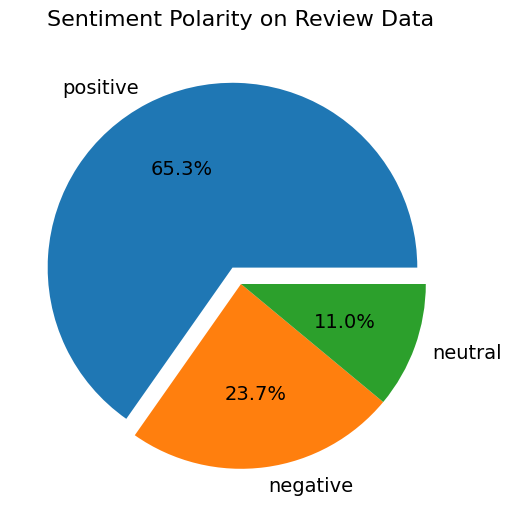

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

# Explode otomatis sesuai jumlah kategori
explode = [0.1] + [0] * (len(labels) - 1)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

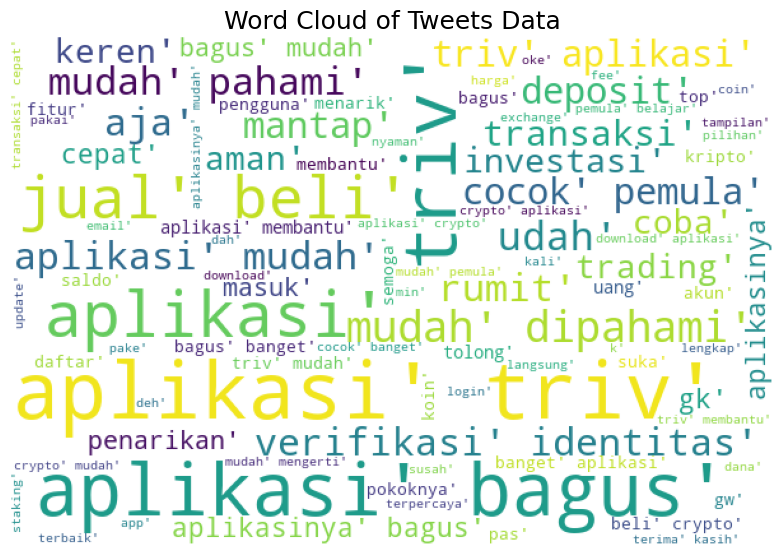

In [ ]:
# === POSITIVE TWEETS ===
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

# === NEGATIVE TWEETS ===
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets.head(10)  # ← DIPERBAIKI
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

# === WORD CLOUD ===
# Gabungkan semua teks (asumsikan text_stopword berisi string)
list_words = ' '.join(clean_df['text_stopword'].astype(str))  

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

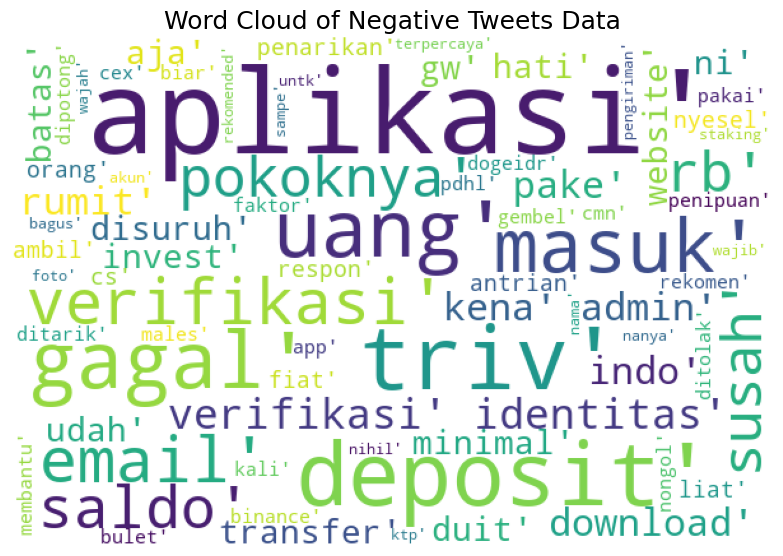

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari negative_tweets
list_words = ' '.join(negative_tweets['text_stopword'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

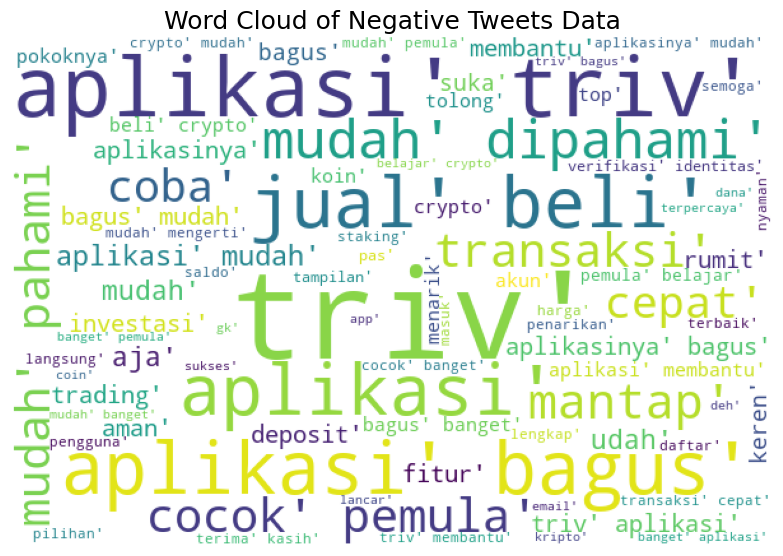

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari positive_tweets
list_words = ' '.join(positive_tweets['text_stopword'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

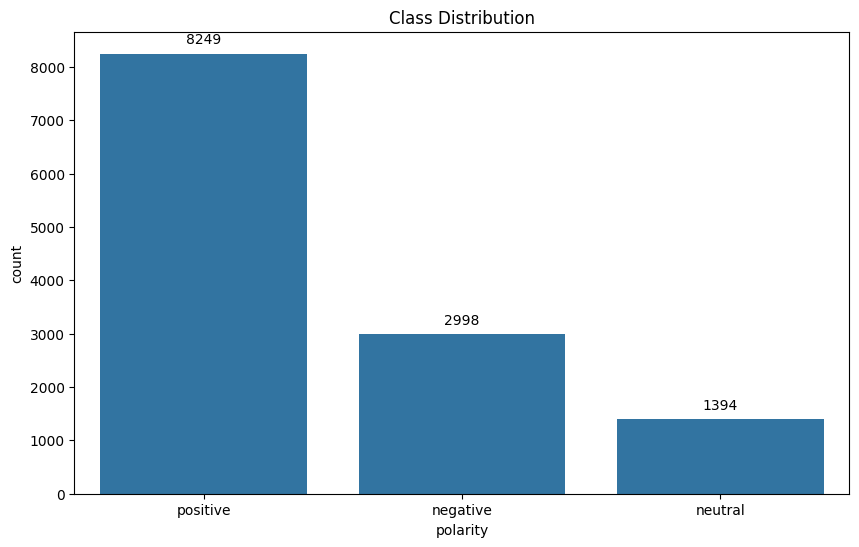

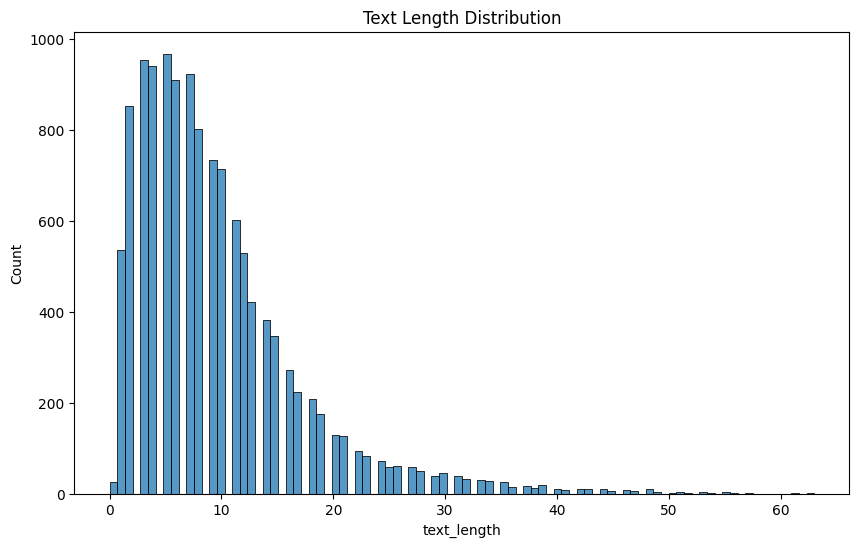

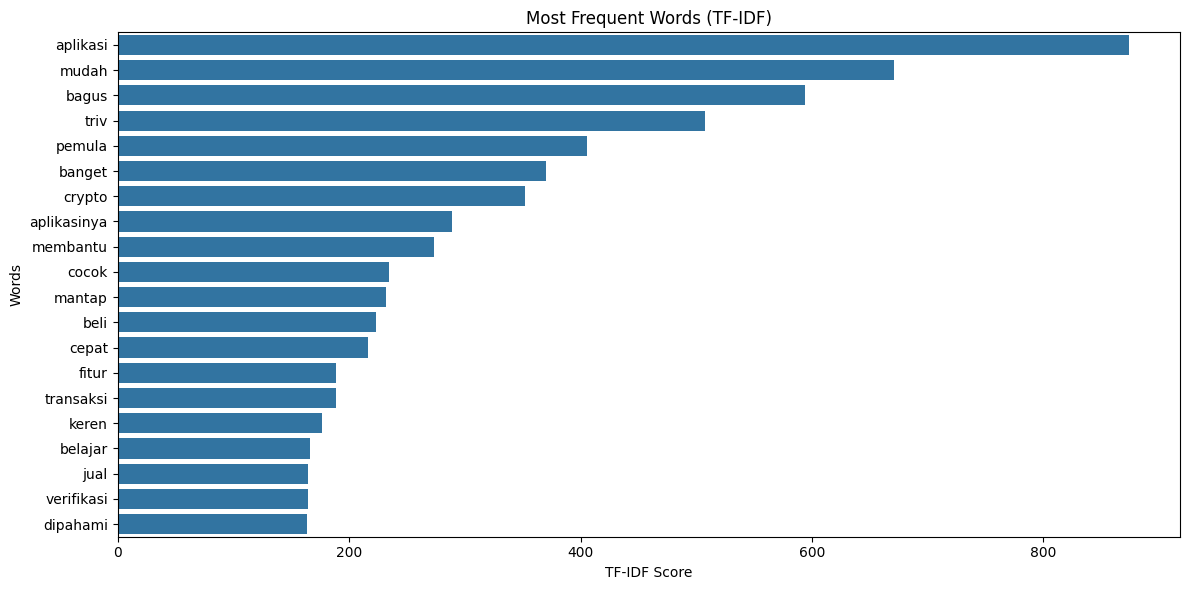

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# === 1. CLASS DISTRIBUTION ===
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# === 2. TEXT LENGTH DISTRIBUTION ===
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# === 3. MOST FREQUENT WORDS (TF-IDF) ===
plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])

# Cara cepat: hitung sum langsung dari sparse matrix
tfidf_sum = np.array(X.sum(axis=0)).flatten()

# Ambil feature names (kompatibel dengan semua versi scikit-learn)
try:
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    feature_names = vectorizer.get_feature_names()

# Buat DataFrame
tfidf_df = pd.DataFrame({
    'word': feature_names,
    'jumlah': tfidf_sum
}).sort_values('jumlah', ascending=False).head(20)

# Plot
sns.barplot(x='jumlah', y='word', data=tfidf_df)
plt.title('Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.tight_layout()
plt.show()